<a href="https://colab.research.google.com/github/vishal13230/quantitative_finance/blob/main/Financial_Signal_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import yfinance as yf

In [ ]:
# Download the stock data
stock_data = yf.download(["UJJIVAN.NS"], start = "2018-12-12")

[*********************100%***********************]  1 of 1 completed


In [ ]:
pip install yfinance

In [ ]:
# Take a look at the top 5 data
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-12,221.250000,228.600006,220.500000,227.250000,225.580200,1857775
2018-12-13,231.899994,252.399994,231.550003,245.600006,243.795364,7390713
2018-12-14,242.699997,244.449997,238.000000,241.399994,239.626205,1761248
2018-12-17,243.800003,249.399994,238.850006,242.500000,240.718140,1461691
2018-12-18,239.100006,255.199997,236.000000,250.699997,248.857880,3942881


In [ ]:
# Create adj close price column
stock_price = stock_data["Adj Close"]

In [ ]:
# Create a voulume variable
stock_volume = stock_data["Volume"]

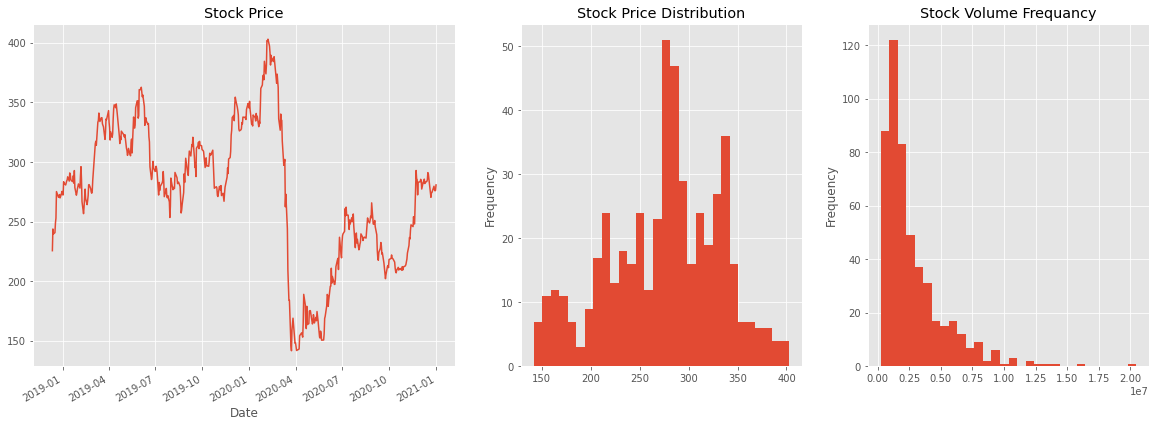

In [ ]:
# Plot the stock price and frequancy
subplots_ratio = dict(width_ratios = [3, 2, 2], height_ratios = [1])
fig, ax = plt.subplots(1, 3, gridspec_kw = subplots_ratio, figsize = (20, 7))
stock_price.plot(title = "Stock Price", ax = ax[0])
stock_price.plot.hist(title = "Stock Price Distribution", ax = ax[1], bins = 30)
stock_volume.plot.hist(title = "Stock Volume Frequancy", ax = ax[2], bins = 30)
# plt.savefig("Stock.png")

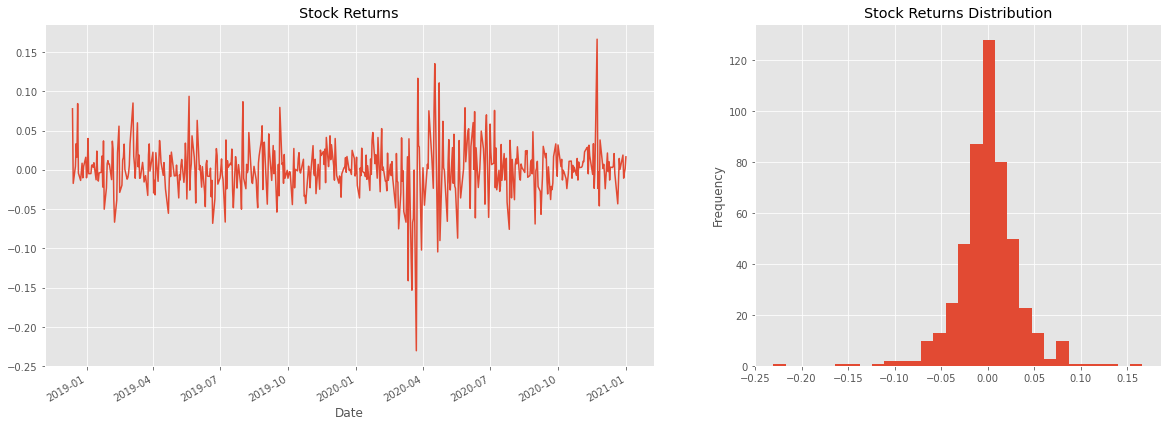

In [ ]:
# Calculating log return 
log_reurn = stock_price.apply(np.log).diff(1)

# Plot the log return
subplots_ratio = dict(width_ratios = [3, 2], height_ratios = [1])
fig, ax = plt.subplots(1, 2, gridspec_kw = subplots_ratio, figsize = (20, 7))
log_reurn.plot(title = "Stock Returns", ax = ax[0])
log_reurn.plot.hist(title = "Stock Returns Distribution", ax = ax[1], bins = 30)
# plt.savefig("Stock_Return.png")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa30166c470>,
      dtype=object)

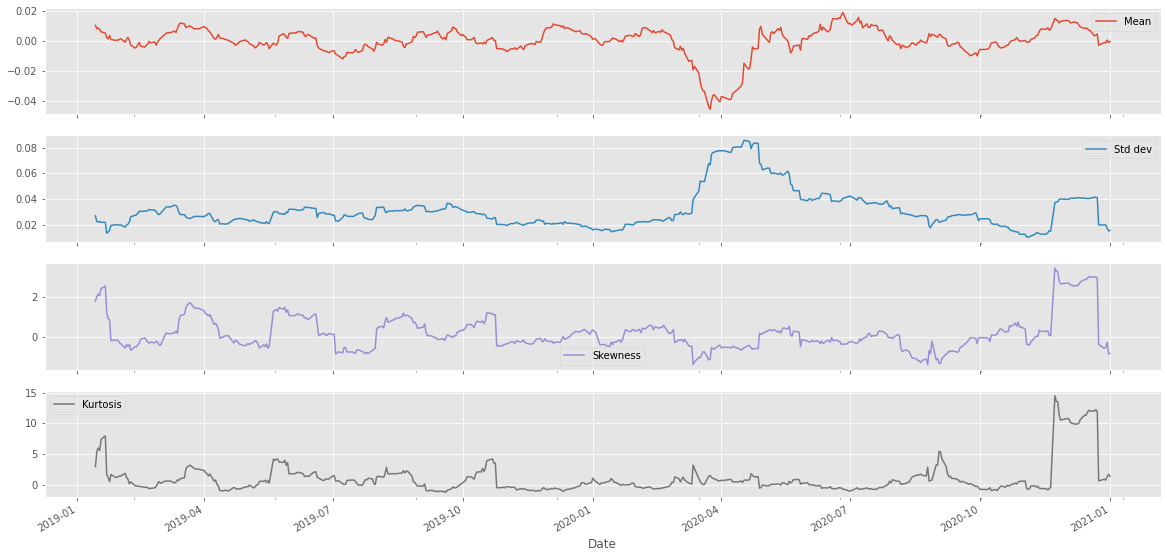

In [ ]:
# Rolling statistics of stock price
w = 22 # number of trading days in a month
s1 = log_reurn.rolling(w).mean()
s2 = log_reurn.rolling(w).std()
s3 = log_reurn.rolling(w).skew()
s4 = log_reurn.rolling(w).kurt()

signals = pd.concat([s1, s2, s3, s4], axis = 1)
signals.columns = ["Mean", "Std dev", "Skewness", "Kurtosis"]
signals.plot(subplots = True, figsize = (20, 10))
# plt.savefig("Stock_Signals.png")

In [ ]:
#  Download the data for NSE-50
nifty_data = yf.download(["^NSEI"], start = "2018-12-12")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Take a look at the top 5 data
nifty_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-12,10591.000000,10752.200195,10560.799805,10737.599609,10737.599609,360500
2018-12-13,10810.750000,10838.599609,10749.500000,10791.549805,10791.549805,376200
2018-12-14,10784.500000,10815.750000,10752.099609,10805.450195,10805.450195,340100
2018-12-17,10853.200195,10900.349609,10844.849609,10888.349609,10888.349609,296900
2018-12-18,10850.900391,10915.400391,10819.099609,10908.700195,10908.700195,286100


In [ ]:
# Create adj close price column
nifty_price = nifty_data["Adj Close"]

In [ ]:
# Create a voulume variable
nifty_volume = nifty_data["Volume"]

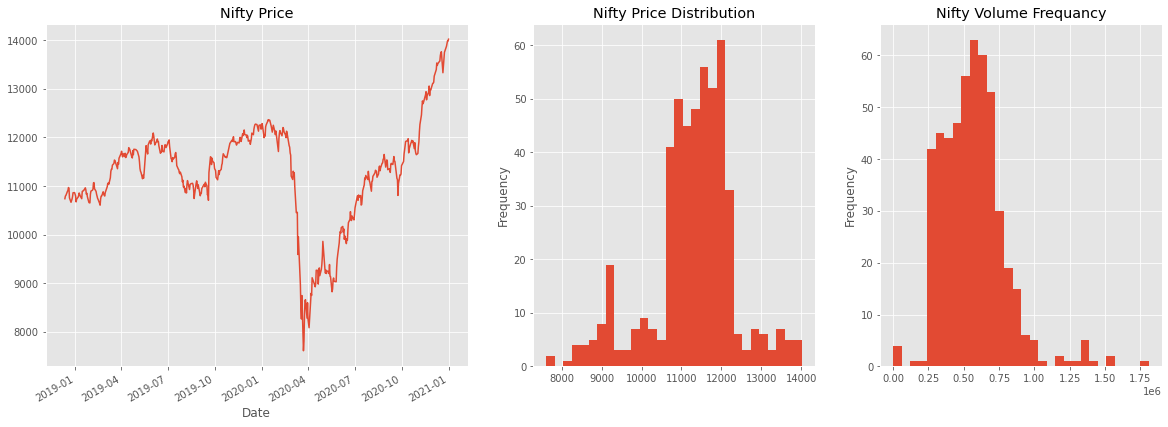

In [ ]:
# Plot the nifty price and frequancy
subplots_ratio = dict(width_ratios = [3, 2, 2], height_ratios = [1])
fig, ax = plt.subplots(1, 3, gridspec_kw = subplots_ratio, figsize = (20, 7))
nifty_price.plot(title = "Nifty Price", ax = ax[0])
nifty_price.plot.hist(title = "Nifty Price Distribution", ax = ax[1], bins = 30)
nifty_volume.plot.hist(title = "Nifty Volume Frequancy", ax = ax[2], bins = 30)
plt.savefig("Nifty.png")

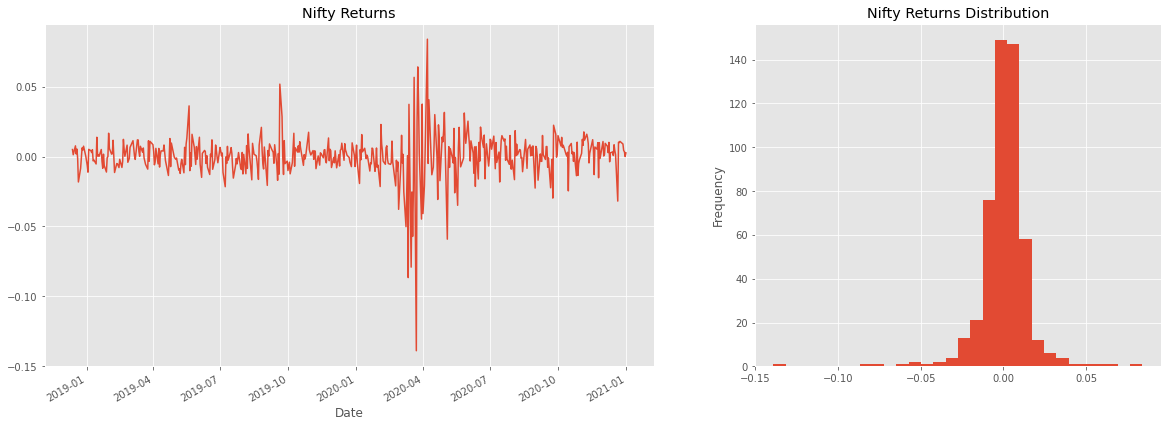

In [ ]:
# Calculating log return 
nifty_log_reurn = nifty_price.apply(np.log).diff(1)

# Plot the log return
subplots_ratio = dict(width_ratios = [3, 2], height_ratios = [1])
fig, ax = plt.subplots(1, 2, gridspec_kw = subplots_ratio, figsize = (20, 7))
nifty_log_reurn.plot(title = "Nifty Returns", ax = ax[0])
nifty_log_reurn.plot.hist(title = "Nifty Returns Distribution", ax = ax[1], bins = 30)
plt.savefig("Nifty_Return.png")

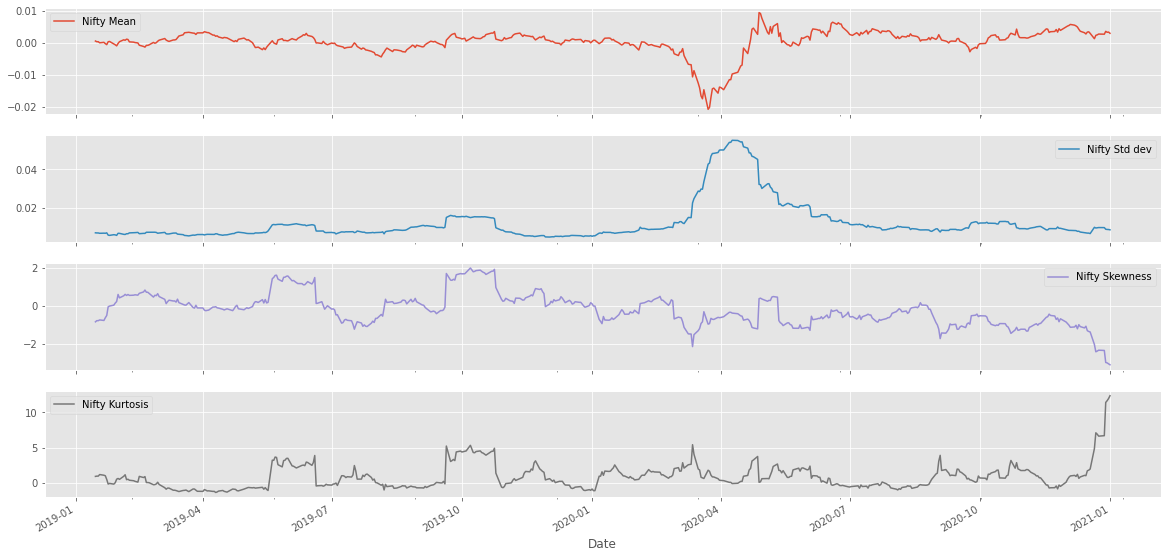

In [ ]:
# Rolling statistics of nifty price
w = 22 # number of trading days in a month
ns1 = nifty_log_reurn.rolling(w).mean()
ns2 = nifty_log_reurn.rolling(w).std()
ns3 = nifty_log_reurn.rolling(w).skew()
ns4 = nifty_log_reurn.rolling(w).kurt()

nifty_signals = pd.concat([ns1, ns2, ns3, ns4], axis = 1)
nifty_signals.columns = ["Nifty Mean", "Nifty Std dev", "Nifty Skewness", "Nifty Kurtosis"]
nifty_signals.plot(subplots = True, figsize = (20, 10))
plt.savefig("Nifty_Signals.png")

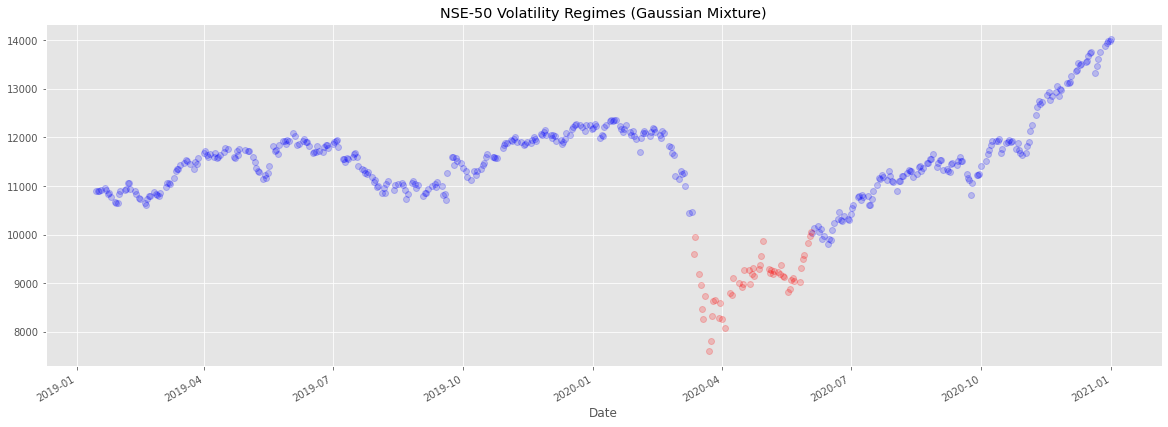

In [ ]:
# Volatility clustering for NSE-50

from sklearn.mixture import GaussianMixture

w = 22
volatility = nifty_log_reurn.rolling(w).std()
volatility = volatility.dropna()

labels = GaussianMixture(2).fit_predict(volatility.values.reshape(-1, 1))

plt.figure(figsize = (20, 7))
nifty_price = nifty_price.reindex(volatility.index)
nifty_price[labels == 0].plot(style = "bo", alpha = 0.2)
nifty_price[labels == 1].plot(style = "ro", alpha = 0.2)
plt.title("NSE-50 Volatility Regimes (Gaussian Mixture)")
plt.savefig("NSE-50_Volatility.png")

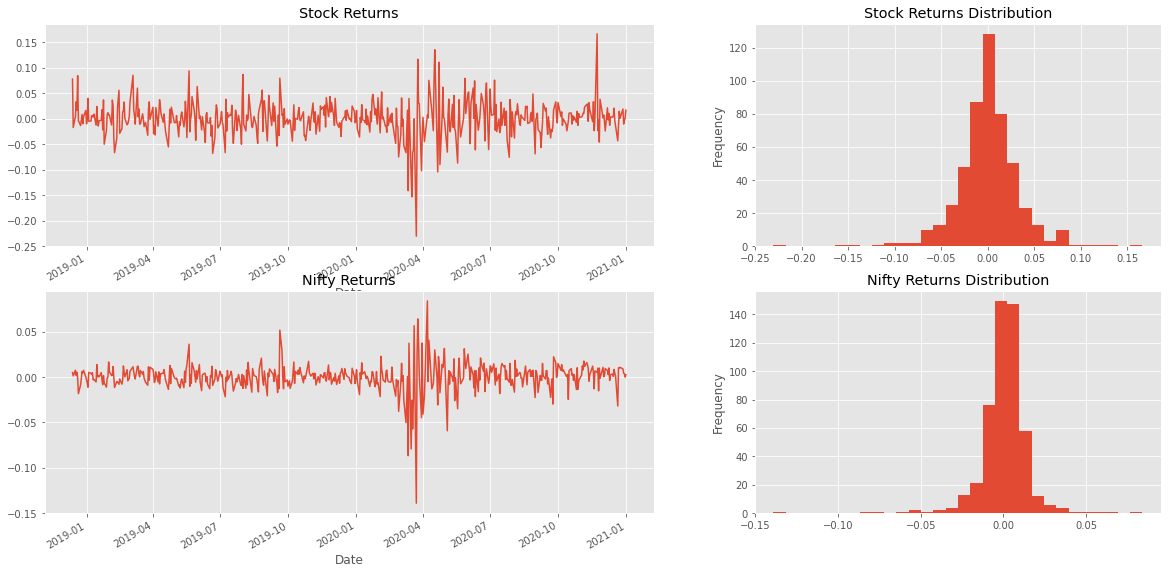

In [ ]:
# Plot the log return for stock and nifty
subplots_ratio = dict(width_ratios = [3, 2], height_ratios = [1, 1])
fig, ax = plt.subplots(2, 2, gridspec_kw = subplots_ratio, figsize = (20, 10))
log_reurn.plot(title = "Stock Returns", ax = ax[0, 0])
log_reurn.plot.hist(title = "Stock Returns Distribution", ax = ax[0, 1], bins = 30)
nifty_log_reurn.plot(title = "Nifty Returns", ax = ax[1, 0])
nifty_log_reurn.plot.hist(title = "Nifty Returns Distribution", ax = ax[1, 1], bins = 30)
# plt.savefig("Nifty_Stock_Return.png")

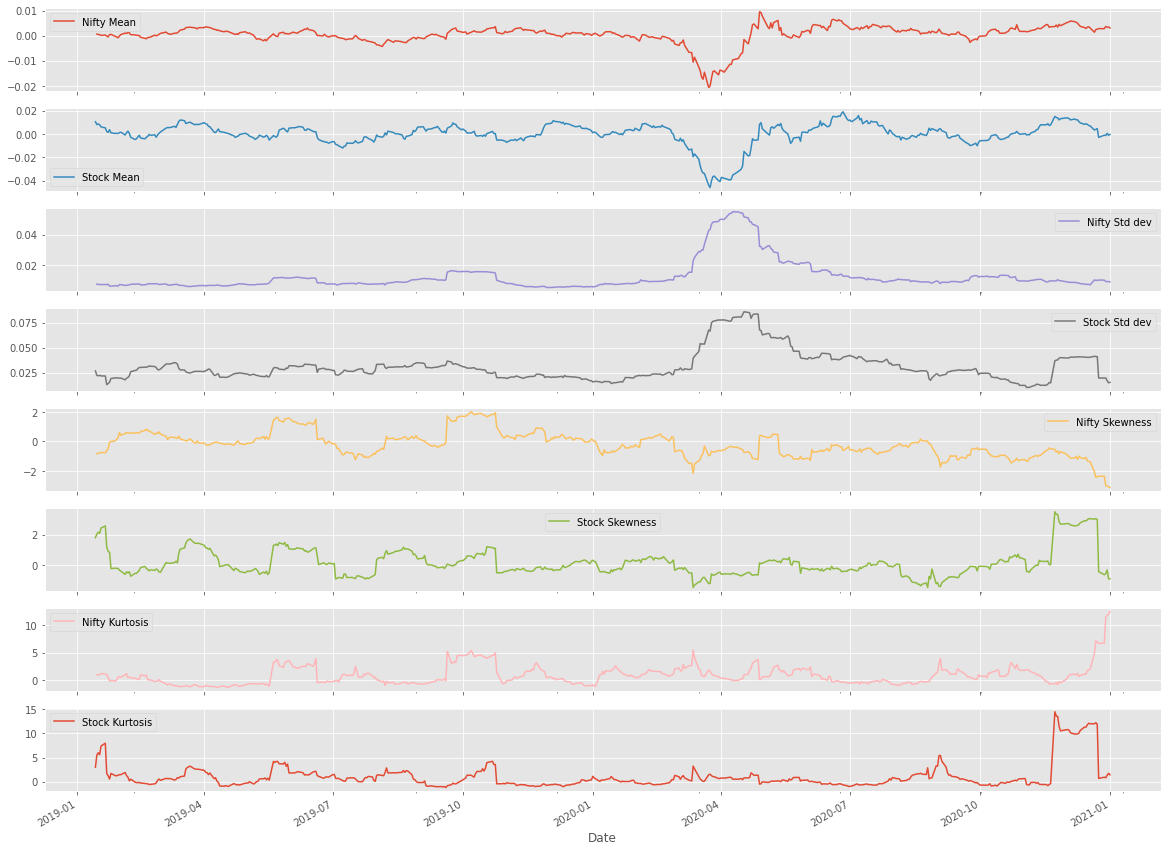

In [ ]:
# Rolling statistics of nifty and stock price
w = 22 # number of trading days in a month
ns1 = nifty_log_reurn.rolling(w).mean()
ns2 = nifty_log_reurn.rolling(w).std()
ns3 = nifty_log_reurn.rolling(w).skew()
ns4 = nifty_log_reurn.rolling(w).kurt()

s1 = log_reurn.rolling(w).mean()
s2 = log_reurn.rolling(w).std()
s3 = log_reurn.rolling(w).skew()
s4 = log_reurn.rolling(w).kurt()

compare_signals = pd.concat([ns1, s1, ns2, s2, ns3, s3, ns4, s4], axis = 1)
compare_signals.columns = ["Nifty Mean", "Stock Mean", "Nifty Std dev", "Stock Std dev", "Nifty Skewness", "Stock Skewness", "Nifty Kurtosis", "Stock Kurtosis"]
compare_signals.plot(subplots = True, figsize = (20, 16))
# plt.savefig("Nifty_Stock_Signals_Compare.png")